In [5]:
import csv
import os
import numpy as np
from scipy.optimize import *  #curve_fit
from numpy.fft import fft, fftfreq, fftshift
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.colors as colors
from scipy.ndimage.interpolation import rotate
from scipy.signal import savgol_filter
import cv2
%matplotlib notebook



<IPython.core.display.Javascript object>


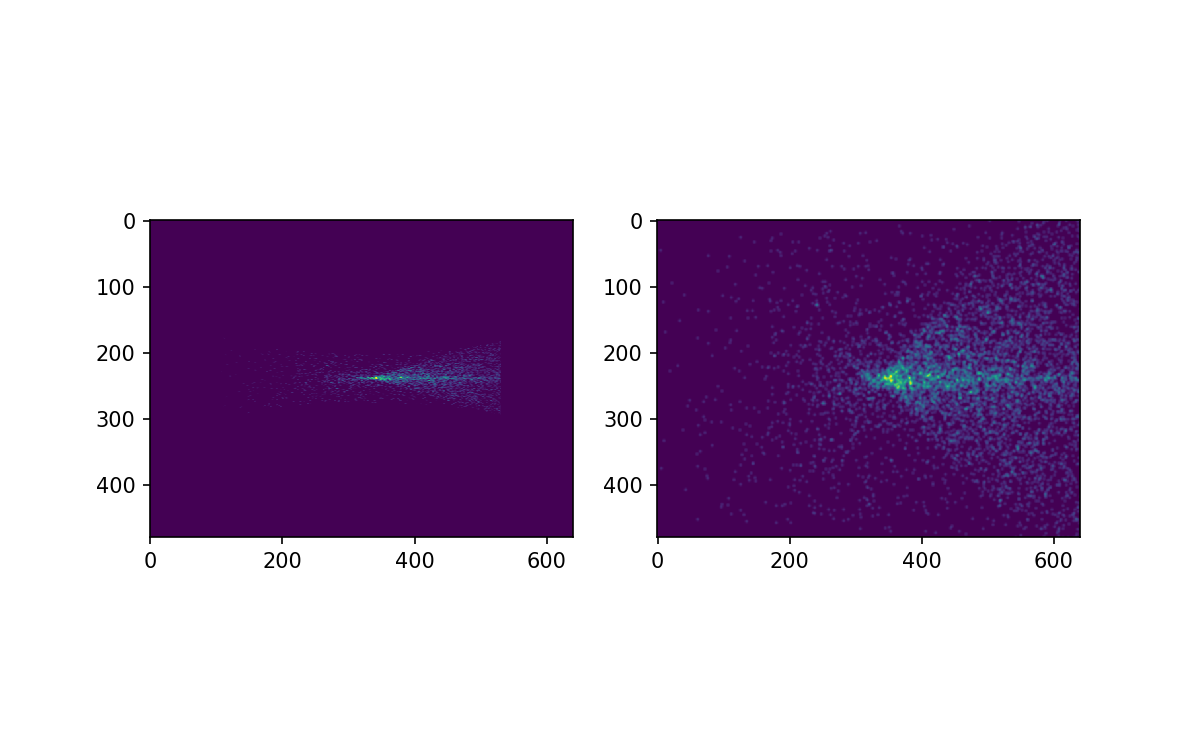

In [6]:
plt.figure(figsize=(8,5))
plt.subplot(1,2,1)
plt.imshow(corr)
plt.subplot(1,2,2)
plt.imshow(raw)
plt.show()

<IPython.core.display.Javascript object>


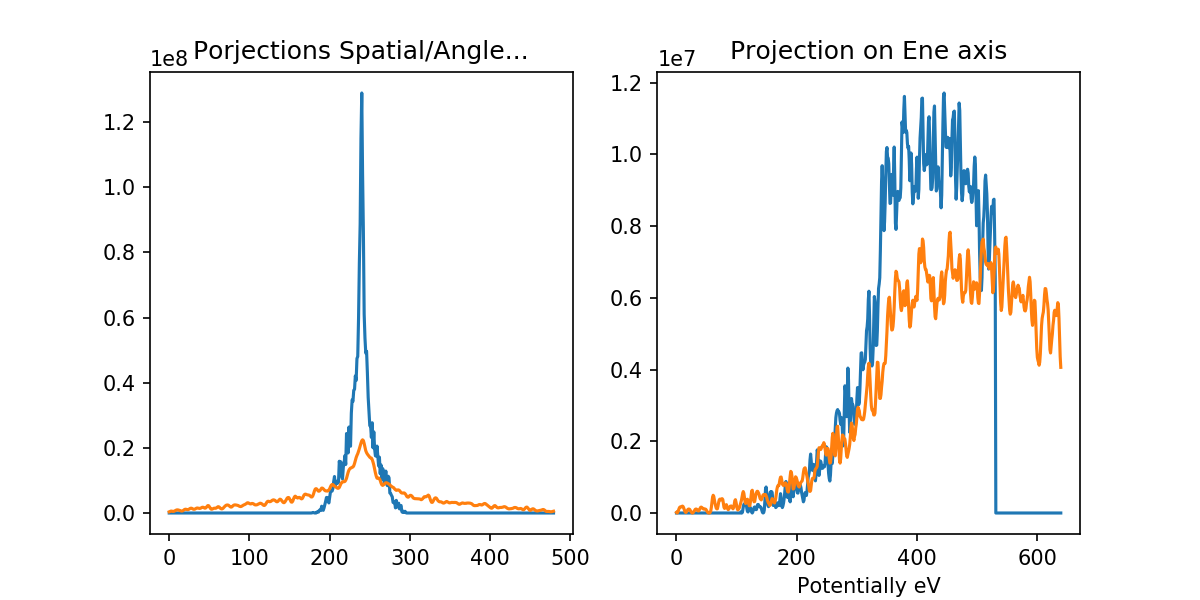

In [9]:
plt.figure(figsize=(8, 4))
plt.subplot(1,2,1)
plt.title("Porjections Spatial/Angle...")
plt.plot(np.sum(corr, axis = 1))
plt.plot(np.sum(raw, axis = 1))
plt.subplot(1,2,2)
plt.title("Projection on Ene axis")
plt.plot(np.sum(corr, axis = 0))
plt.plot(np.sum(raw, axis = 0))
plt.xlabel("Potentially eV")

plt.show()

In [7]:
pts1 = np.float32([[0,35],[640,35],[640,450],[0,450]])
pts2 = np.float32([[107,0],[530,0],[530,480],[107,480]])

#pts1 = np.float32([[0,33],[640,0],[640,480],[0,450]])
#pts2 = np.float32([[107,0],[530,0],[530,480],[107,480]])

M = cv2.getPerspectiveTransform(pts1,pts2)
dst = cv2.warpPerspective(raw,M,(640,480))
print(M)

[[ 6.60937500e-01  3.56659147e-15  1.07000000e+02]
 [ 1.06165077e-15  1.15662651e+00 -4.04819277e+01]
 [ 4.96022494e-18  1.08149167e-17  1.00000000e+00]]


<IPython.core.display.Javascript object>


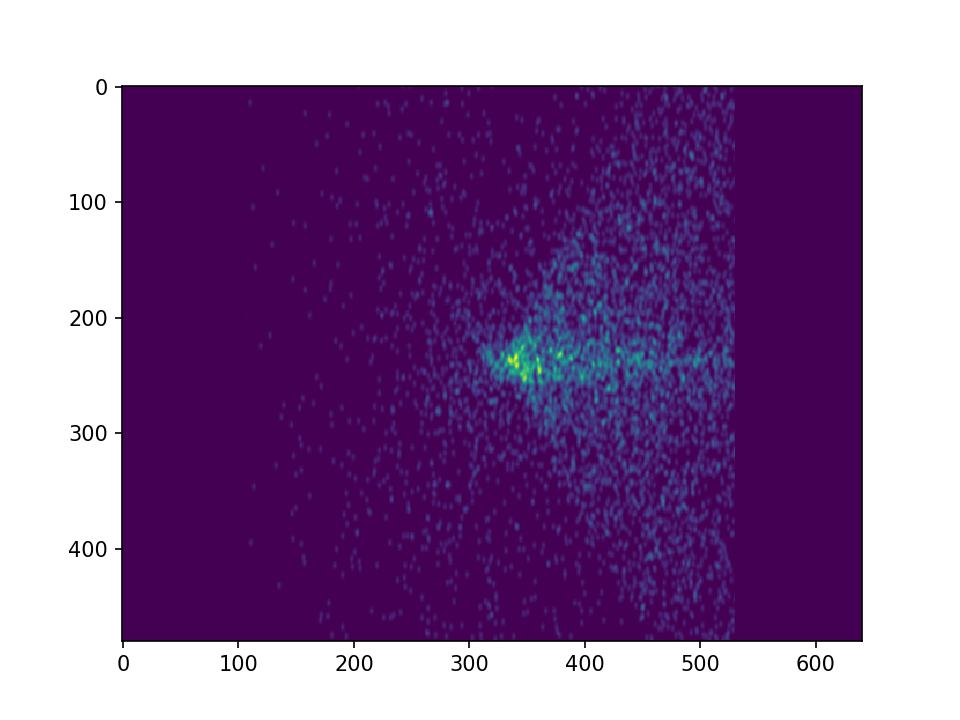

In [8]:
plt.figure()
plt.imshow(dst)
plt.show()

<IPython.core.display.Javascript object>


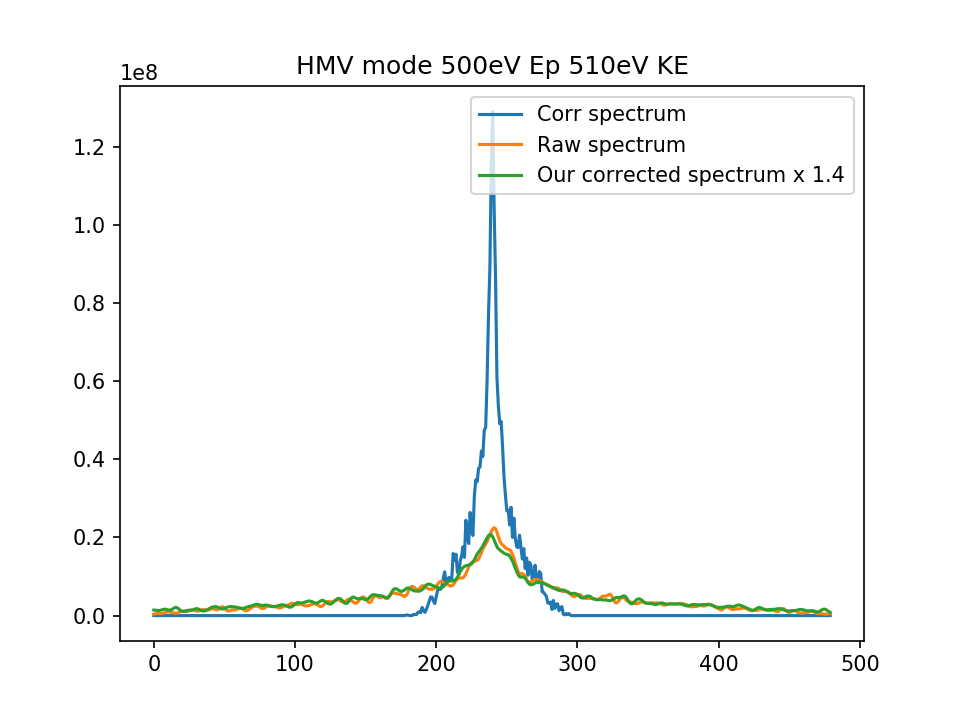

In [14]:
plt.figure()
plt.title("HMV mode 500eV Ep 510eV KE")
plt.plot(np.sum(corr, axis = 1), label = "Corr spectrum")
plt.plot(np.sum(raw, axis = 1), label = "Raw spectrum")
plt.plot(1.4*np.sum(dst, axis = 1), label = "Our corrected spectrum x 1.4")
#plt.xlabel("longitu")
plt.legend()
plt.show()

<IPython.core.display.Javascript object>


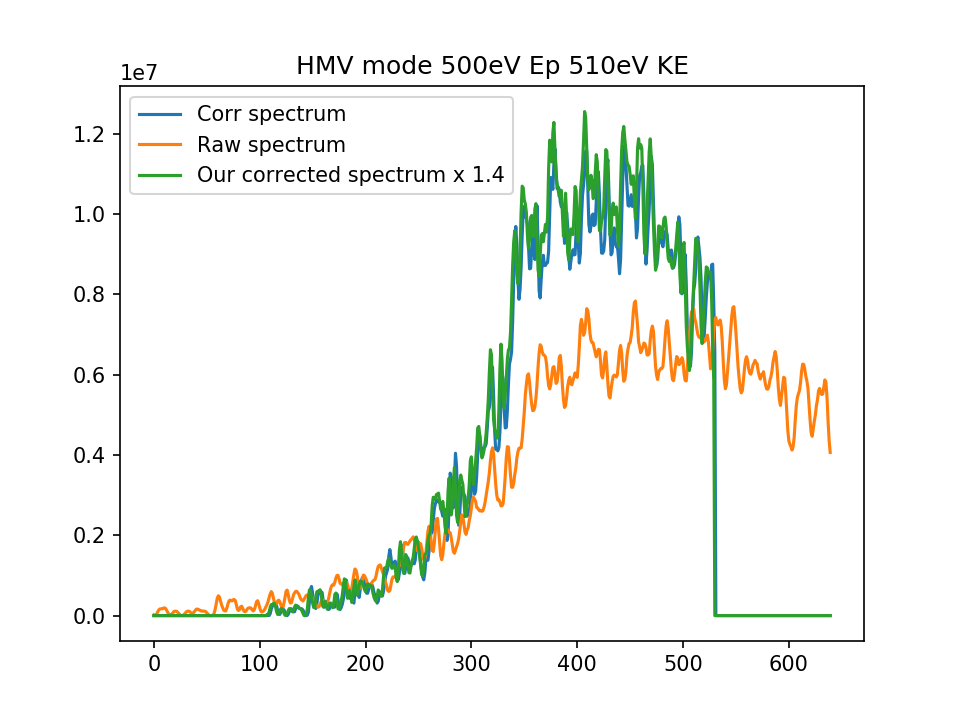

In [9]:
plt.figure()
plt.title("HMV mode 500eV Ep 510eV KE")
plt.plot(np.sum(corr, axis = 0), label = "Corr spectrum")
plt.plot(np.sum(raw, axis = 0), label = "Raw spectrum")
plt.plot(1.4*np.sum(dst, axis = 0), label = "Our corrected spectrum x 1.4")
#plt.xlabel("longitu")
plt.legend()
plt.show()

In [ ]:
## High order correction:


